In [1]:
data_dir = r"C:\Users\Nasra\OneDrive\سطح المكتب\AI lab\project\project AI\hymenoptera_data"

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [3]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



In [4]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}

In [5]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

In [6]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
dataset_sizes

{'train': 244, 'val': 153}

In [7]:
dataset_sizes["train"]

244

In [8]:
class_names = image_datasets['train'].classes
class_names

['ants', 'bees']

In [9]:
models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [12]:
device

device(type='cpu')

In [13]:
models.list_models()

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [18]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')

In [19]:
model_ft.modules

<bound method Module.modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

In [20]:
num_ftrs = model_ft.fc.in_features
num_ftrs

512

In [21]:
# Here the size of each output sample is set to 2.
model_ft.fc = nn.Linear(num_ftrs, 2)

# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

len(class_names)

2

In [22]:
model_ft = model_ft.to(device)

In [23]:
criterion = nn.CrossEntropyLoss()

In [24]:
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

In [25]:
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [27]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    #save the best model
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

In [28]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 0.6613 Acc: 0.6639
val Loss: 0.4110 Acc: 0.7974

Epoch 1/4
----------
train Loss: 0.5569 Acc: 0.7377
val Loss: 0.5452 Acc: 0.7974

Epoch 2/4
----------
train Loss: 0.7378 Acc: 0.7459
val Loss: 0.4984 Acc: 0.8366

Epoch 3/4
----------
train Loss: 0.3846 Acc: 0.8443
val Loss: 0.4125 Acc: 0.8497

Epoch 4/4
----------
train Loss: 0.5166 Acc: 0.8279
val Loss: 0.4650 Acc: 0.8039

Training complete in 2m 21s
Best val Acc: 0.849673


In [29]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [30]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.5046 Acc: 0.7459
val Loss: 0.2529 Acc: 0.9085

Epoch 1/9
----------
train Loss: 0.5744 Acc: 0.7172
val Loss: 0.1872 Acc: 0.9412

Epoch 2/9
----------
train Loss: 0.4543 Acc: 0.8320
val Loss: 0.4024 Acc: 0.8431

Epoch 3/9
----------
train Loss: 0.5343 Acc: 0.7910
val Loss: 0.2702 Acc: 0.8954

Epoch 4/9
----------
train Loss: 0.4855 Acc: 0.8033
val Loss: 0.2623 Acc: 0.8954

Epoch 5/9
----------
train Loss: 0.5266 Acc: 0.7992
val Loss: 0.4116 Acc: 0.8366

Epoch 6/9
----------
train Loss: 0.4304 Acc: 0.8361
val Loss: 0.1950 Acc: 0.9477

Epoch 7/9
----------
train Loss: 0.4031 Acc: 0.8074
val Loss: 0.1909 Acc: 0.9412

Epoch 8/9
----------
train Loss: 0.3704 Acc: 0.8402
val Loss: 0.2064 Acc: 0.9281

Epoch 9/9
----------
train Loss: 0.4219 Acc: 0.8443
val Loss: 0.2083 Acc: 0.9412

Training complete in 2m 46s
Best val Acc: 0.947712


In [31]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

In [32]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

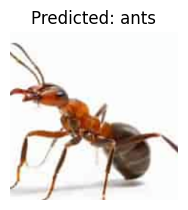

In [44]:
# الحل الصحيح - استخدم raw string للمسار
import os

# خيار 1: raw string
img_path = r'C:\Users\Nasra\OneDrive\سطح المكتب\project AI\Ants-beesClassifier\Data\valduition\ants\download.jpeg'

# خيار 2: forward slashes (أسهل)
# img_path = 'C:/Users/Nasra/OneDrive/سطح المكتب/project AI/Ants-beesClassifier/Data/valduition/bees/OIP (1).jpeg'

# خيار 3: os.path.join (الأفضل)
# img_path = os.path.join('C:', 'Users', 'Nasra', 'OneDrive', 'سطح المكتب', 'project AI', 'Ants-beesClassifier', 'Data', 'valduition', 'bees', 'OIP (1).jpeg')

visualize_model_predictions(
    model_conv,
    img_path=img_path
)

plt.ioff()
plt.show()


In [45]:
visualize_model_predictions(
    model_conv,
    img_path='C:\Users\Nasra\OneDrive\سطح المكتب\project AI\Ants-beesClassifier\Data\valduition\ants\download.jpeg'
)

plt.ioff()
plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2932952506.py, line 3)

In [46]:
torch.save(model_conv, "ant_bee_model2.pt")


In [47]:
torch.save(model_conv.state_dict(), "ant_bee_model.pt")

In [48]:
model_c = torch.load("ant_bee_model.pt")

In [52]:

# الحل الصحيح - استخدم raw string
img_path = r"C:\Users\Nasra\OneDrive\سطح المكتب\project AI\Ants-beesClassifier\Data\valduition\bees\OIP.jpeg"
img = Image.open(img_path)
img = data_transforms['val'](img)
img = img.unsqueeze(0)
img = img.to(device)

with torch.no_grad():
    outputs = model_conv(img)
    _, preds = torch.max(outputs, 1)
    print(f'Predicted: {class_names[preds[0]]}')

Predicted: bees
